TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'int'

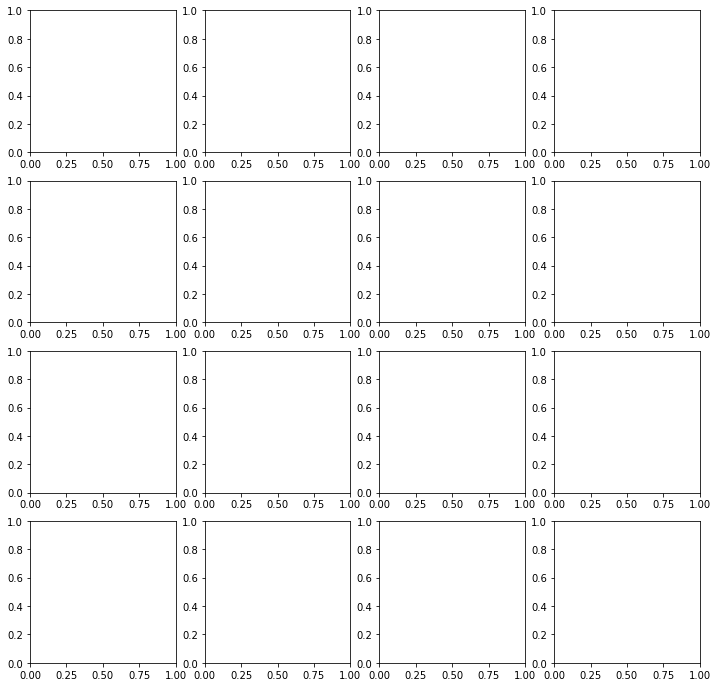

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#pol=[1,0,8,0,32,0,80,0,138,0,168,0,144,0,80,0,26]
pol=[1,0,0,1]
#pol=[1,0,4,0,8,0,8,0,5]
dpol=[0,3,0,0]
roots=np.roots(pol)
size=200
it=20

def f(x):
    return np.polyval(pol,x)

def g(x):
    return np.polyval(dpol,x)

def m(x,n):
    if(n<=1):
        x=f(x)+grid
        grid[np.absolute(x)>2]=1
        x[np.absolute(x)>2]=0
        return x
    else:
        grid[np.absolute(x)>2]=n
        x=f(m(x,n-1))+grid
        x[np.absolute(x)>2]=0
        return x

def close(x):
    v=np.full(x.shape, False, dtype=bool)
    for i in range(roots.size):
        v[np.absolute(x-roots[i])<0.1]=True
    return v

fig=plt.figure(figsize=(12,12))
axes=fig.subplots(4,4)

grid=np.tile(np.linspace(-2,2,num=size,dtype=complex),(size,1))+np.transpose(np.tile(np.linspace(-2,2,num=size,dtype=complex),(size,1)))*1j

ind=np.zeros(grid.shape)

def render(grid,ind):
    for i in range(it):
        grid-=f(grid)/g(grid)
        ind[np.logical_and(close(grid),ind==0)]=i
        ind[np.absolute(grid)>100000]=iter+1
        grid[ind==iter+1]=0
    ind[ind==iter+1]=0

grid=np.tile(np.linspace(-2,2,num=size,dtype=complex),(size,1))+np.transpose(np.tile(np.linspace(-2,2,num=size,dtype=complex),(size,1)))*1j
ind=np.zeros(grid.shape)
dpol=[0,3,0,0]#0*0.01*(i*4+k)]
render(grid,ind)
plt.imshow(np.absolute(grid),cmap='inferno',origin='lower',interpolation='hermite')
for i in range(0):
    for k in range(0):
        grid=np.tile(np.linspace(-2,2,num=size,dtype=complex),(size,1))+np.transpose(np.tile(np.linspace(-2,2,num=size,dtype=complex),(size,1)))*1j
        ind=np.zeros(grid.shape)
        dpol=[0,3,0,0]#0*0.01*(i*4+k)]
        render(grid,ind)
        axes[i,k].imshow(np.absolute(grid),cmap='inferno',origin='lower',interpolation='hermite')
        axes[i,k].axis('off')